## Visualizaciones de datos en Python (Parte II)

# Objetivos

1. Graficar datos en Python.
2. Entender el uso básico de las librerías más utilizadas: Matplotlib y Seaborn.

In [1]:
# Importación de paquetes
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Repaso `matplotlib`

Para declarar una visualización utilizamos el método `subplots` del módulo `matplotlib.pyplot`. Este nos permite crear un objeto de tipo `figure` (`fig`) para establecer el lienzo sobre el cual colocaremos un gráfico y un objeto de tipo `axes`(`ax`) que hace referencia a un gráfico. 

    fig, ax = plt.subplots()

Asimismo, podemos colocar más de un gráfico en un mismo lienzo. Para esto, ingresamos por parámetro el número de filas (`n`) y el número de columnas (`m`) en las que queremos dividir el lienzo. 

    fig, ax = plt.subplots(n,m)

In [2]:
# Importación de datos sobre precipitaciones:

df_lluvias = pd.read_csv('...\\pune_1965_to_2002.csv')
df_lluvias.index = df_lluvias['Year']
df_lluvias = df_lluvias.drop('Year', axis='columns')
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


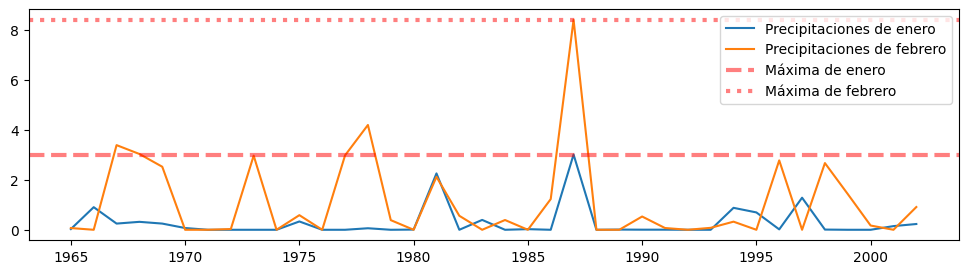

In [3]:
# Graficamos lluvias para Enero y Febrero:

fig, ax = plt.subplots(figsize=(12, 3))  
ax.plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')

# Determinamos los máximos niveles de precipitaciones para Enero y Febrero, trazamos líneas de máximos:

maximo_enero = df_lluvias['Jan'].max()
maximo_febrero =  df_lluvias['Feb'].max()

ax.axhline(maximo_enero, color='red', linestyle='--', alpha=0.5, linewidth=3, label='Máxima de enero')
ax.axhline(maximo_febrero, color='red', linestyle=':', alpha=0.5, linewidth=3, label='Máxima de febrero')
ax.legend()
plt.show()

### 1.1. Subgráficos

Es posible generar varios gráficos dentro de una misma figura. Esto puede resultar útil, por ejemplo, si queremos comparar distintas variables sin sobrecargar un gráfico particular. Para ello, pasaremos como parámetro 'nrows' y 'ncols' a la función plt.subplots() los cuales representan la cantidad de filas y la cantidad de columnas del gráfico respectivamente. 
<br>Al hacer esto, el objeto 'ax' se convierte en un arreglo, en donde cada elemento es un objeto Axes particular. Para añadir una línea al primer gráfico, nos referiremos al primer elementos del arreglo ax, mediante ax[0]. Para añadir una línea al segundo gráfico, lo haremos con ax[1] y así sucesivamente.

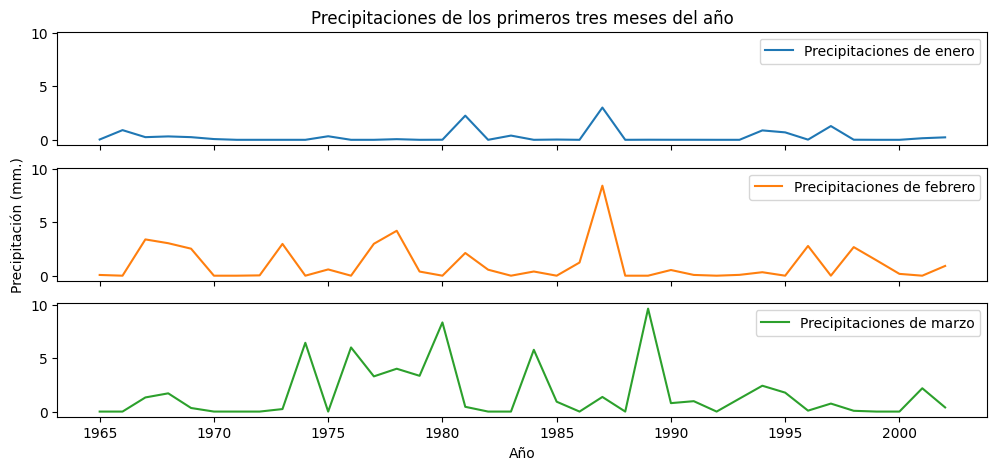

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')

ax[0].set_title('Precipitaciones de los primeros tres meses del año') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Precipitación (mm.)')  

ax[0].legend()  
ax[1].legend()
ax[2].legend()  
plt.show()

*Nota:*  Los argumentos 'sharex' y 'sharey' en plt.subplots(), permiten a los gráficos compartir los ejes y por lo tanto `matplotlib` únicamente agrega los bins de los años en el último gráfico.

### 1.2. Parámetros modificables y personalización

Matplotlib facilita la personalización de los gráficos mediante la modificación de sus parámetros globales. Cuando importamos la librería, Matplotlib establece sus parámetros por defecto los cuales definen las distintas características de las visualizaciones que genera, como por ejemplo el tamaño de las etiquetas, el tamaño de los ejes, los tamaños de fuente, la tipografía, el grosor de las líneas y muchos más.

In [5]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

#### Ejemplo de modificaciones:

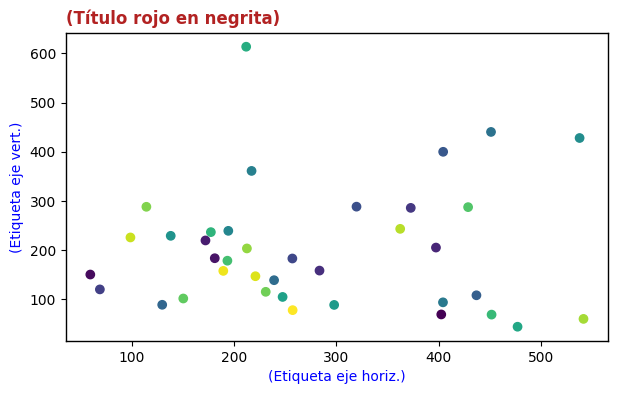

In [6]:
mpl.rcParams['axes.titleweight'] = 'bold'           # Peso de fuente del título
mpl.rcParams['axes.titlelocation'] = 'left'         # Alineación del título {izquierda, derecha, centro}
mpl.rcParams['axes.titlecolor'] = 'firebrick'       # Color de título
mpl.rcParams['axes.labelcolor'] = 'blue'            # Color de fuente de las etiquetas x e y
mpl.rcParams['axes.labelsize'] = '10'               # Tamaño de fuente de las etiquetas x e y
mpl.rcParams['axes.labelweight'] = 'light'          # Peso de fuente de las etiquetas x e y
mpl.rcParams['axes.linewidth'] = '1'                # Ancho de línea entre puntos

fig, ax = plt.subplots(figsize=(7, 4))  
ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)

ax.set_title('(Título rojo en negrita)')
ax.set_xlabel('(Etiqueta eje horiz.)')
ax.set_ylabel('(Etiqueta eje vert.)')

plt.show()

Para volver a establecer los parámetros por defecto, ejecutar la siguiente línea:

In [7]:
mpl.rcParams.update(mpl.rcParamsDefault)

## 2. Paquete `seaborn`

La librería Seaborn, es un apoyo natural al análisis de datos y la creación de gráficos para la toma de decisiones. Una de las características de Seaborn que justifican su uso es que se integra muy bien con las estructuras de datos de Pandas, lo que permite generar visualizaciones de data frames muy fácilmente y en pocas líneas de código.

In [8]:
sns.set()

### 2.1. Ejemplos de uso del paquete

Si bien todas las visualizaciones anteriores podrían generarse con `seaborn`, hay que tener en cuenta que este tiene un sintaxis levemente diferente por lo que no vale la pena su utilización para gráficos que podrían realizarse fácilmente con `matplotlib`. Sin embargo, la verdadera ventaja de Seaborn reside en la visualización de conjuntos de datos con variables categóricas. 

In [9]:
# Utilizamos el DF precargado de Seaborn 'excercise':

df_ejercicio = sns.load_dataset('exercise')
df_ejercicio = df_ejercicio.drop('Unnamed: 0', axis='columns')
df_ejercicio.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


Nos podría interesar la forma de la distribución de las pulsaciones para los distintos tipos de actividad tras 30 minutos de haber realizado la misma:

<Figure size 640x480 with 0 Axes>

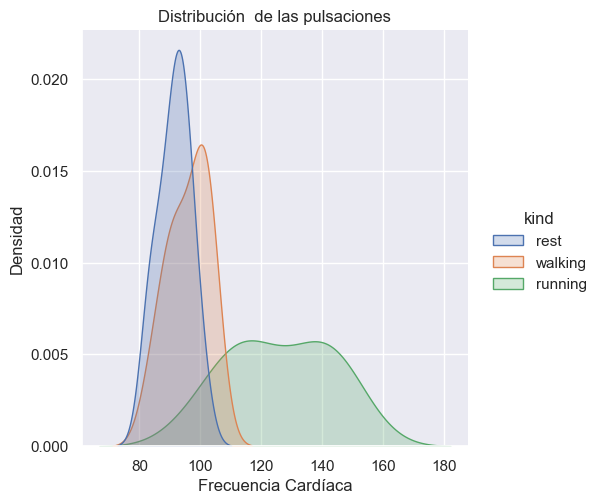

In [10]:
plt.figure()
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']

# Parámetros Seaborn:
## kind: Método para visualizar los datos. Selecciona la función de trazado subyacente y determina el conjunto adicional de parámetros válidos.
## hue: Variable semántica que se asigna para determinar el color de los elementos de la trama.
## fill: llena el área debajo de la(s) curva(s)

ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')
plt.show()

<Figure size 640x480 with 0 Axes>

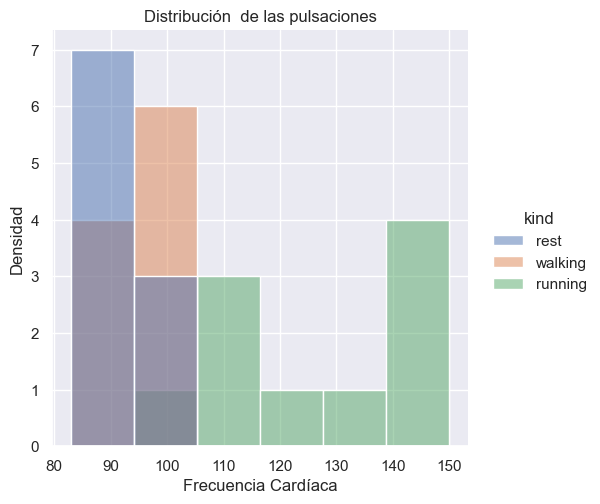

In [11]:
plt.figure()
# Elaboramos una boolean mask para filtrar la distribución de pulsasiones en 30 minutos:
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']

# Graficamos en este caso un histograma:
ax = sns.displot(data=df_30_min, x='pulse', kind='hist', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')
plt.show()

*Nota:* El parámetro hue determina en base a qué columna de variables categóricas se debe realizar el agrupamiento. En este caso, en base al tipo de ejercicio.

Si en cambio quisiéramos comparar aquellas personas que tienen una dieta baja en grasas (categoría low fat) respecto de aquellas que no consumen grasas (categoría no fat), sólo hay que cambiar el parámetro hue anterior por la columna 'diet'.

<Figure size 640x480 with 0 Axes>

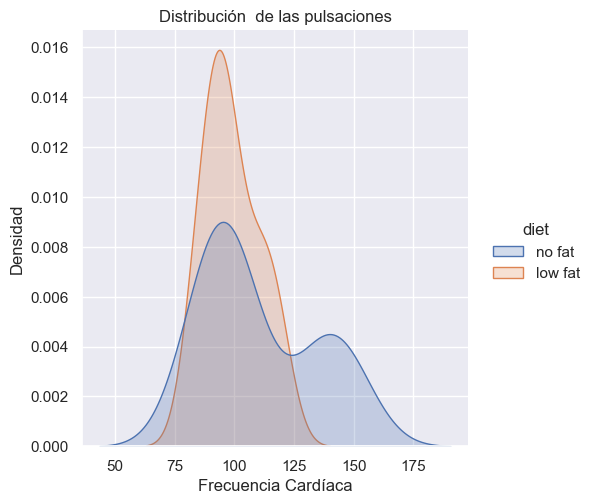

In [12]:
plt.figure()
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']

# Cambiamos la categoría de 'hue' por 'diet':
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='diet', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')
plt.show()

### 2.2. Ejemplos de graficación para variables categóricas
A continuación se muestran otras forma de visualizar distribuciones según categorías.

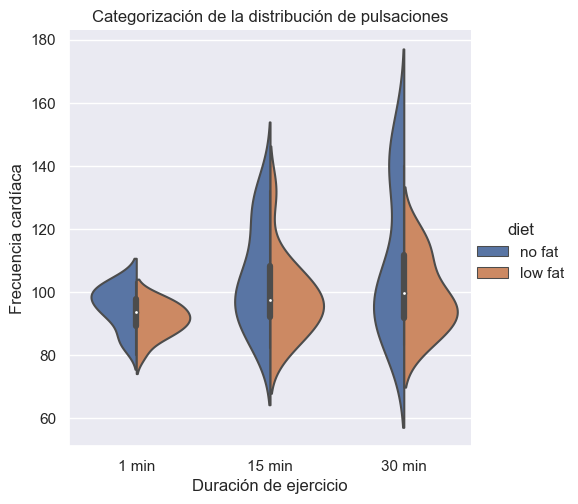

In [13]:
# Cambiamos el parámetro 'kind' por 'violin' y graficamos:

ax = sns.catplot(data=df_ejercicio, kind='violin', x='time', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duración de ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')
plt.show()

O bien, para distintos tipos de ejercicio:

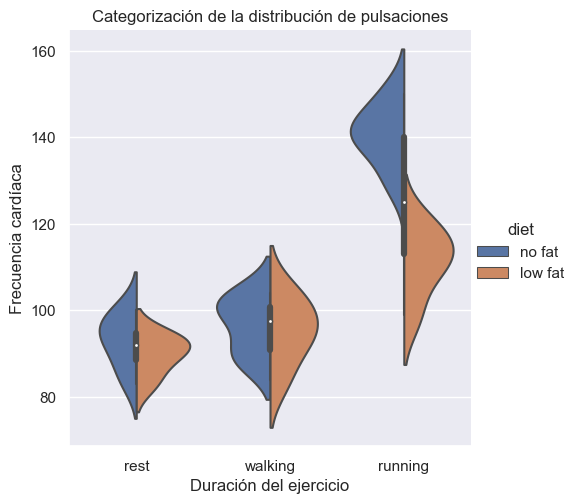

In [14]:
ax = sns.catplot(data=df_30_min, kind='violin', x='kind', y='pulse',   hue='diet', split=True)
ax.set(xlabel='Duración del ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')
plt.show()